<a href="https://colab.research.google.com/github/Esmreety/CNN/blob/master/Implementing_CNN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
6


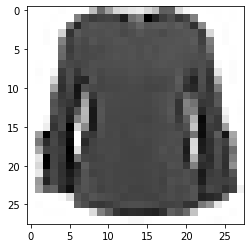

In [2]:
 mnist = keras.datasets.fashion_mnist
 (x_train, y_train),(x_test, y_test)  = mnist.load_data()
 index = 8888
 print(y_train[index])
 plt.imshow(x_train[index], cmap = 'Greys')
 plt.show()
 

In [0]:
# Reshaping the array to 4-dims
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [0]:
#normalizing
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
print('x_train shape is:', x_train.shape)
print('x_test shape is:', x_test.shape)
print('no of images in x_train is:', x_train.shape[0])
print('no of images in x_test is:', x_test.shape[0])

x_train shape is: (60000, 28, 28, 1)
x_test shape is: (10000, 28, 28, 1)
no of images in x_train is: 60000
no of images in x_test is: 10000


In [0]:
#Creating sequential model and adding layers
model = Sequential()
model.add(Conv2D(32, kernel_size = (5,5), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (5,5), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) #flattening 2d matrix data to 1d vector before building fully connected layer
model.add(Dense(1024, activation = tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation = tf.nn.softmax))

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 10)
model.summary()

Epoch 1/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.1070 - accuracy: 0.9630
Epoch 2/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0929 - accuracy: 0.9682
Epoch 3/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0882 - accuracy: 0.9694
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0804 - accuracy: 0.9719
Epoch 5/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0796 - accuracy: 0.9735
Epoch 6/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0779 - accuracy: 0.9742
Epoch 7/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0739 - accuracy: 0.9755
Epoch 8/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0805 - accuracy: 0.9744
Epoch 9/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0743 - accuracy: 0.9769
Epoch 10/10
60000/60000 [==============================

In [14]:
x = model.evaluate(x_test, y_test)
print(x)
print('loss:', x[0])
print('Accuracy:', x[1])

10000/10000 [==============================] - 3s 321us/step
[0.6542292178148403, 0.9021999835968018]
loss: 0.6542292178148403
Accuracy: 0.9021999835968018
